In [7]:
import pymongo
from pymongo import MongoClient
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
import warnings
from nbi1 import *
from numpy.random import randn
from scipy.stats import anderson
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import scipy

warnings.filterwarnings('ignore')

## Import Data

In [5]:
### Dataset without outliers
df_no_outliers = pd.read_csv("02-20-19-thesis-dataset-without-outliers", index_col=0 )

### Dataset with outlier
df = pd.read_csv("02-20-19-thesis-dataset", index_col=0 )

## Normality Test

In [10]:
def normality_test(data):
    # normality test
    result = anderson(data)
    print("Anderson - Darling Test")
    print("---"*15)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks Gaussian (fail to reject H0) ' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look Gaussian (reject H0) ' % (sl, cv))
    print("\n")
    print("D’Agostino’s K^2 Test")
    print("---"*15)
    
    
    stat, p = normaltest(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')
        
    print("\n")
    print("Kolmogorov-Smirnov")
    print("---"*15)

    stat, p = scipy.stats.kstest(data, cdf='norm')
    if p > alpha:
        print('Data looks Gaussian (fail to reject H0)')
    else:
        print('Data does not look Gaussian (reject H0)')
        
    # q-q plot
    qqplot(data, line='s')
    pyplot.show()
    

### Results : Data without outliers

Anderson - Darling Test
---------------------------------------------
Statistic: 3087.328
15.000: 0.576, data does not look Gaussian (reject H0) 
10.000: 0.656, data does not look Gaussian (reject H0) 
5.000: 0.787, data does not look Gaussian (reject H0) 
2.500: 0.918, data does not look Gaussian (reject H0) 
1.000: 1.092, data does not look Gaussian (reject H0) 


D’Agostino’s K^2 Test
---------------------------------------------
Statistics=17273.528, p=0.000
Data does not look Gaussian (reject H0)


Kolmogorov-Smirnov
---------------------------------------------
Data does not look Gaussian (reject H0)


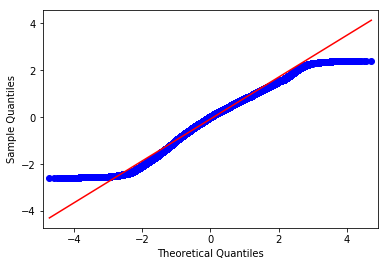

In [11]:
normality_test(df_no_outliers["Baseline Difference Score"])

### Results : Data with outliers

Anderson - Darling Test
---------------------------------------------
Statistic: 9942.995
15.000: 0.576, data does not look Gaussian (reject H0) 
10.000: 0.656, data does not look Gaussian (reject H0) 
5.000: 0.787, data does not look Gaussian (reject H0) 
2.500: 0.918, data does not look Gaussian (reject H0) 
1.000: 1.092, data does not look Gaussian (reject H0) 


D’Agostino’s K^2 Test
---------------------------------------------
Statistics=189872.493, p=0.000
Data does not look Gaussian (reject H0)


Kolmogorov-Smirnov
---------------------------------------------
Data does not look Gaussian (reject H0)


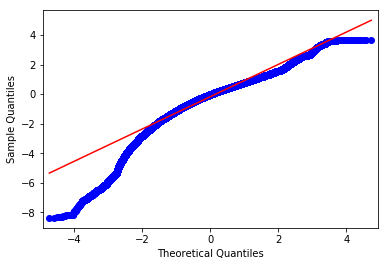

In [12]:
normality_test(df["Baseline Difference Score"])